In [1]:
import pandas as pd
import numpy as np

# Loading Kickstarter Data

In [2]:
projects = pd.read_csv('data/ks-projects-201801.csv', encoding='ISO-8859-1')

In [3]:
projects

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,224,US,52375.00,52375.00,50000.00
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,16,US,1205.00,1205.00,1000.00
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,failed,40,US,453.00,453.00,25000.00
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,canceled,58,US,8233.00,8233.00,125000.00
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,2014-07-11 21:55:48,6240.57,canceled,43,US,6240.57,6240.57,65000.00


In [4]:
projects.shape

(378661, 15)

In [5]:
liveProjects = projects[projects.state.str.startswith('live')]

In [6]:
liveProjects.shape

(2799, 15)

In [7]:
prunedProjects = projects[~(projects.state.str.startswith('canceled') | projects.state.str.startswith('live') | projects.state.str.startswith('suspended'))]

In [8]:
prunedProjects.shape

(335237, 15)

# Getting related data

In [9]:
# maybe try backers, category also
truth_related_cols = ['ID', 'state']
related_cols = ['ID', 'name', 'main_category', 'launched', 'deadline', 'usd_goal_real', 'usd_pledged_real']

In [10]:
related_projects = prunedProjects[related_cols]
related_live_projects = liveProjects[related_cols]

In [11]:
related_projects.head()

,ID,name,main_category,launched,deadline,usd_goal_real,usd_pledged_real
0,1000002330,The Songs of Adelaide & Abullah,Publishing,2015-08-11 12:12:28,2015-10-09,1533.95,0.0
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Film & Video,2017-09-02 04:43:57,2017-11-01,30000.00,2421.0
2,1000004038,Where is Hank?,Film & Video,2013-01-12 00:20:50,2013-02-26,45000.00,220.0
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,2012-03-17 03:24:11,2012-04-16,5000.00,1.0
5,1000014025,Monarch Espresso Bar,Food,2016-02-26 13:38:27,2016-04-01,50000.00,52375.0


# Pruning Data

In [12]:
prunedData = prunedProjects[related_projects.deadline.str.startswith('2018') | related_projects.deadline.str.startswith('2017')]

In [13]:
prunedData

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00
14,1000057089,Tombstone: Old West tabletop game and miniatur...,Tabletop Games,Games,GBP,2017-05-03,5000.0,2017-04-05 19:44:18,94175.00,successful,761,GB,57763.78,121857.33,6469.73
21,1000081649,MikeyJ clothing brand fundraiser,Childrenswear,Fashion,AUD,2017-09-07,2500.0,2017-08-08 01:20:20,1.00,failed,1,AU,0.00,0.81,2026.10
29,100011318,My Moon - Animated Short Film,Animation,Film & Video,USD,2017-05-03,50000.0,2017-04-03 17:11:33,57577.31,successful,840,US,10120.00,57577.31,50000.00
43,1000170964,Penny Bingo Playing Card Game fun for the whol...,Tabletop Games,Games,USD,2017-03-27,1500.0,2017-03-02 04:01:43,856.00,failed,25,US,324.00,856.00,1500.00
51,100020143,H2O The Underwater Portraits,People,Photography,USD,2017-10-30,9500.0,2017-09-25 17:17:43,6.00,failed,2,US,5.00,6.00,9500.00
67,1000256230,Shreddit - Privacy on Reddit,Software,Technology,GBP,2017-07-02,2000.0,2017-06-02 12:20:21,0.00,failed,0,GB,0.00,0.00,2579.35
90,1000348690,The Silence of Hollowind - Urban Fantasy RPG,Tabletop Games,Games,EUR,2017-11-23,5000.0,2017-10-24 16:58:01,11238.00,successful,346,IT,5509.51,13347.43,5938.52
106,10004373,Bad Example (A Southern Trailer Park Fairy Tal...,Shorts,Film & Video,USD,2017-05-08,1800.0,2017-04-03 23:25:55,22.00,failed,2,US,7.00,22.00,1800.00
112,1000468345,iRNinja - Control your TV with a simple press ...,Gadgets,Technology,USD,2017-06-14,500.0,2017-05-10 16:00:18,74.00,failed,6,US,261.00,74.00,500.00


In [14]:
prunedData = prunedData[prunedData.usd_goal_real > 8000]

In [15]:
prunedData.shape

(18871, 15)

In [16]:
prunedData[['ID', 'main_category', 'deadline', 'launched', 'usd_pledged_real', 'usd_goal_real']]

,ID,main_category,deadline,launched,usd_pledged_real,usd_goal_real
1,1000003930,Film & Video,2017-11-01,2017-09-02 04:43:57,2421.00,30000.00
29,100011318,Film & Video,2017-05-03,2017-04-03 17:11:33,57577.31,50000.00
51,100020143,Photography,2017-10-30,2017-09-25 17:17:43,6.00,9500.00
117,1000491057,Film & Video,2017-04-09,2017-03-10 01:12:32,40.00,50000.00
163,1000654409,Technology,2017-12-07,2017-11-04 19:46:50,4237.00,50000.00
197,1000804742,Journalism,2017-02-24,2017-01-25 16:21:21,423.72,12554.61
203,1000834930,Food,2017-01-23,2016-12-01 21:16:27,0.00,38112.66
241,1001052357,Comics,2017-01-08,2016-12-09 04:00:31,623.55,13490.22
270,1001216413,Design,2017-03-09,2017-01-22 16:53:55,4264.68,62575.57
292,1001302417,Fashion,2017-07-01,2017-05-22 11:38:07,1.14,22824.02


In [17]:
truth = prunedData[truth_related_cols]
live_truth = liveProjects[truth_related_cols]

In [18]:
truth.head()

,ID,state
1,1000003930,failed
29,100011318,successful
51,100020143,failed
117,1000491057,failed
163,1000654409,failed


In [19]:
live_truth.head()

,ID,state
40,1000149007,live
183,1000761521,live
458,1002183790,live
537,1002599057,live
544,1002629894,live


# One Hot Encoding

In [20]:
projectsCategory_out = prunedData.drop(['main_category', 'goal', 'usd pledged', 'state'], 1).join(projects.main_category.str.get_dummies())
liveProjectsCategory_out = liveProjects.drop(['main_category', 'goal', 'usd pledged', 'state'], 1).join(liveProjects.main_category.str.get_dummies())

In [21]:
print(projectsCategory_out.shape)
print(liveProjectsCategory_out.shape)

(18871, 26)
(2799, 26)


In [22]:
projectsCategory_out = projectsCategory_out.reset_index()
liveProjectsCategory_out = liveProjectsCategory_out.reset_index()

In [23]:
projectsCategory_out = projectsCategory_out.drop('index',axis=1).set_index('ID')
liveProjectsCategory_out = liveProjectsCategory_out.drop('index',axis=1).set_index('ID')

In [24]:
projectsCategory_out = projectsCategory_out.groupby(projectsCategory_out.index).sum()
liveProjectsCategory_out = liveProjectsCategory_out.groupby(liveProjectsCategory_out.index).sum()

In [25]:
projectsCategory_out = projectsCategory_out.reset_index()
projectsCategory_out = projectsCategory_out.drop(['pledged', 'backers'], axis=1)
projectsCategory_out.head()

,ID,usd_pledged_real,usd_goal_real,Art,Comics,Crafts,Dance,Design,Fashion,Film & Video,Food,Games,Journalism,Music,Photography,Publishing,Technology,Theater
0,358771,132060.01,50000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,422684,14964.00,34000.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,452247,747.74,43783.3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,640380,3146.00,18000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,771637,358286.00,30000.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [26]:
liveProjectsCategory_out = liveProjectsCategory_out.reset_index()
liveProjectsCategory_out = liveProjectsCategory_out.drop(['pledged', 'backers'], axis=1)
liveProjectsCategory_out.head()

,ID,usd_pledged_real,usd_goal_real,Art,Comics,Crafts,Dance,Design,Fashion,Film & Video,Food,Games,Journalism,Music,Photography,Publishing,Technology,Theater
0,511375,0.00,4500.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,571559,114.16,2125.65,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,799352,423.36,3195.14,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,871453,0.00,6819.89,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,979704,2383.48,2223.00,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


# Turn Ground Truths into Numeric Representation

In [27]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(truth['state'])
LE_truth = le.transform(truth['state'])

In [28]:
LE_truth

array([0, 1, 0, ..., 1, 0, 1], dtype=int64)

In [29]:
truth = truth.drop('state', 1)

In [30]:
truth['state'] = LE_truth

In [31]:
truth.head()

,ID,state
1,1000003930,0
29,100011318,1
51,100020143,0
117,1000491057,0
163,1000654409,0


In [32]:
le2 = preprocessing.LabelEncoder()
le2.fit(live_truth['state'])
LE2_truth = le2.transform(live_truth['state'])

In [33]:
live_truth = live_truth.drop('state', 1)

In [34]:
live_truth['state'] = LE2_truth

In [35]:
projectsCategory_out = projectsCategory_out.merge(truth, on='ID')
liveProjectsCategory_out = liveProjectsCategory_out.merge(live_truth, on='ID')

In [36]:
projectsCategory_out.head()

,ID,usd_pledged_real,usd_goal_real,Art,Comics,Crafts,Dance,Design,Fashion,Film & Video,Food,Games,Journalism,Music,Photography,Publishing,Technology,Theater,state
0,358771,132060.01,50000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
1,422684,14964.00,34000.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,452247,747.74,43783.3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,640380,3146.00,18000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,771637,358286.00,30000.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [37]:
liveProjectsCategory_out.head()

,ID,usd_pledged_real,usd_goal_real,Art,Comics,Crafts,Dance,Design,Fashion,Film & Video,Food,Games,Journalism,Music,Photography,Publishing,Technology,Theater,state
0,511375,0.00,4500.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,571559,114.16,2125.65,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,799352,423.36,3195.14,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,871453,0.00,6819.89,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,979704,2383.48,2223.00,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [38]:
projectsCategory_out.shape

(18871, 19)

# Dates

In [39]:
strippedLaunch = pd.DataFrame()
strippedLaunch['launched'] = prunedData['launched'].str.split(' ').str[0]
live_strippedLaunch = pd.DataFrame()
live_strippedLaunch['launched'] = related_live_projects['launched'].str.split(' ').str[0]

In [40]:
strippedLaunch.head()

,launched
1,2017-09-02
29,2017-04-03
51,2017-09-25
117,2017-03-10
163,2017-11-04


In [41]:
live_strippedLaunch.head()

,launched
40,2017-11-20
183,2017-12-23
458,2017-12-21
537,2017-12-18
544,2017-12-21


In [42]:
# projectsCategory_out['deadline'] = pd.to_datetime(prunedData['deadline'], format='%Y-%m-%d')
dates = pd.DataFrame()
dates['ID'] = prunedData['ID']
dates['deadline'] = pd.to_datetime(prunedData['deadline'], format='%Y-%m-%d')
dates['launched'] = pd.to_datetime(strippedLaunch['launched'], format='%Y-%m-%d')
live_dates = pd.DataFrame()
live_dates['ID'] = related_live_projects['ID']
live_dates['deadline'] = pd.to_datetime(related_live_projects['deadline'], format='%Y-%m-%d')
live_dates['launched'] = pd.to_datetime(live_strippedLaunch['launched'], format='%Y-%m-%d')

In [43]:
dates['Days Active'] = dates['deadline'] - dates['launched']
live_dates['Days Active'] = live_dates['deadline'] - live_dates['launched']

In [44]:
dates.dtypes

ID                       int64
deadline        datetime64[ns]
launched        datetime64[ns]
Days Active    timedelta64[ns]
dtype: object

In [45]:
live_dates.dtypes

ID                       int64
deadline        datetime64[ns]
launched        datetime64[ns]
Days Active    timedelta64[ns]
dtype: object

In [46]:
projectsCategory_out = projectsCategory_out.merge(dates, on='ID')
projectsCategory_out = projectsCategory_out.drop(['deadline', 'launched'], axis = 1)
liveProjectsCategory_out = liveProjectsCategory_out.merge(live_dates, on='ID')
liveProjectsCategory_out = liveProjectsCategory_out.drop(['deadline', 'launched'], axis = 1)

In [47]:
projectsCategory_out.head()

,ID,usd_pledged_real,usd_goal_real,Art,Comics,Crafts,Dance,Design,Fashion,Film & Video,Food,Games,Journalism,Music,Photography,Publishing,Technology,Theater,state,Days Active
0,358771,132060.01,50000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,30 days
1,422684,14964.00,34000.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,38 days
2,452247,747.74,43783.3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,37 days
3,640380,3146.00,18000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,30 days
4,771637,358286.00,30000.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,33 days


In [48]:
liveProjectsCategory_out.head()

,ID,usd_pledged_real,usd_goal_real,Art,Comics,Crafts,Dance,Design,Fashion,Film & Video,Food,Games,Journalism,Music,Photography,Publishing,Technology,Theater,state,Days Active
0,511375,0.00,4500.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,33 days
1,571559,114.16,2125.65,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,30 days
2,799352,423.36,3195.14,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30 days
3,871453,0.00,6819.89,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,30 days
4,979704,2383.48,2223.00,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,60 days


In [49]:
projectsCategory_out['Days Active'] = pd.to_numeric(projectsCategory_out['Days Active'])
liveProjectsCategory_out['Days Active'] = pd.to_numeric(liveProjectsCategory_out['Days Active'])

In [50]:
projectsCategory_out.head()

,ID,usd_pledged_real,usd_goal_real,Art,Comics,Crafts,Dance,Design,Fashion,Film & Video,Food,Games,Journalism,Music,Photography,Publishing,Technology,Theater,state,Days Active
0,358771,132060.01,50000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,2592000000000000
1,422684,14964.00,34000.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3283200000000000
2,452247,747.74,43783.3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3196800000000000
3,640380,3146.00,18000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2592000000000000
4,771637,358286.00,30000.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,2851200000000000


In [51]:
liveProjectsCategory_out.head()

,ID,usd_pledged_real,usd_goal_real,Art,Comics,Crafts,Dance,Design,Fashion,Film & Video,Food,Games,Journalism,Music,Photography,Publishing,Technology,Theater,state,Days Active
0,511375,0.00,4500.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2851200000000000
1,571559,114.16,2125.65,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2592000000000000
2,799352,423.36,3195.14,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2592000000000000
3,871453,0.00,6819.89,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2592000000000000
4,979704,2383.48,2223.00,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,5184000000000000


# Normalizing Data

In [52]:
X = projectsCategory_out[['usd_goal_real', 'usd_pledged_real', 'Days Active']]
std_scaler = preprocessing.StandardScaler()

std_scaler.fit(X)

X_std = std_scaler.transform(X)

In [53]:
X_std

array([[-0.02794554,  0.57914079, -0.4557753 ],
       [-0.03584757, -0.07661381,  0.26312604],
       [-0.03101582, -0.15622693,  0.17326338],
       ...,
       [-0.04671287, -0.16041438, -0.4557753 ],
       [-0.04671287,  0.23580146, -1.08481397],
       [-0.04793655, -0.14974913, -0.4557753 ]])

In [54]:
projectsCategory_out['usd_goal_real'] = X_std[0:,0]
projectsCategory_out['usd_pledged_real'] = X_std[0:,1]
projectsCategory_out['Days Active'] = X_std[0:,2]

In [55]:
projectsCategory_out.head()

,ID,usd_pledged_real,usd_goal_real,Art,Comics,Crafts,Dance,Design,Fashion,Film & Video,Food,Games,Journalism,Music,Photography,Publishing,Technology,Theater,state,Days Active
0,358771,0.579141,-0.027946,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,-0.455775
1,422684,-0.076614,-0.035848,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.263126
2,452247,-0.156227,-0.031016,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.173263
3,640380,-0.142796,-0.043750,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-0.455775
4,771637,1.846039,-0.037823,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,-0.186187


In [56]:
X = liveProjectsCategory_out[['usd_goal_real', 'usd_pledged_real', 'Days Active']]
std_scaler = preprocessing.StandardScaler()

std_scaler.fit(X)

X_std = std_scaler.transform(X)

In [57]:
liveProjectsCategory_out['usd_goal_real'] = X_std[0:,0]
liveProjectsCategory_out['usd_pledged_real'] = X_std[0:,1]
liveProjectsCategory_out['Days Active'] = X_std[0:,2]

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X = np.array(projectsCategory_out.drop(['ID','state'],axis=1))
y = np.array(projectsCategory_out['state'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

In [60]:
print(X_train.shape)
print(X_test.shape)

(11322, 18)
(7549, 18)


In [61]:
print(y_train.shape)
print(y_test.shape)

(11322,)
(7549,)


# SVM Algorithm

In [62]:
from sklearn import svm

svm_clf = svm.SVC()
svm_clf.fit(X_train,y_train)


y_predSVM = svm_clf.predict(X_test)

print("test", y_test[:10])
print("pred", y_predSVM[:10])

test [1 1 0 0 0 0 0 0 0 0]
pred [0 1 0 0 0 0 0 0 0 0]


## Parameter Tuning for SVM

In [63]:
from sklearn.model_selection import GridSearchCV

In [64]:
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = svm.SVC()

clfsvm = GridSearchCV(svc, parameters)

clfsvm.fit(X, y)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'kernel': ('linear', 'rbf'), 'C': [1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [65]:
print(clfsvm.best_score_)
print(clfsvm.best_params_)
print(clfsvm.best_estimator_)

0.976630809178104
{'C': 10, 'kernel': 'linear'}
SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [66]:
svm_clf = svm.SVC(C=10,kernel='linear')
svm_clf.fit(X_train,y_train)


y_predSVM = svm_clf.predict(X_test)

print("test", y_test[:10])
print("pred", y_predSVM[:10])

test [1 1 0 0 0 0 0 0 0 0]
pred [1 1 0 0 0 0 0 0 0 0]


# Logistic Algorithm

In [67]:
import sklearn.linear_model as linear_model

lr_clf = linear_model.LogisticRegression()
lr_clf.fit(X_train, y_train)

y_predREG = lr_clf.predict(X_test)


print("test", y_test[:10])
print("pred", y_predREG[:10])

test [1 1 0 0 0 0 0 0 0 0]
pred [0 1 0 0 0 0 0 0 0 0]


## Parameter Tuning for Logistic

In [68]:
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

clflr = linear_model.LogisticRegression()

clflr = GridSearchCV(clflr, parameters)

clflr.fit(X, y)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [69]:
print(clflr.best_score_)
print(clflr.best_params_)
print(clflr.best_estimator_)

0.9944359069471677
{'C': 1000}
LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [70]:
lr_clf = linear_model.LogisticRegression(C=1000)
lr_clf.fit(X_train, y_train)

y_predREG = lr_clf.predict(X_test)

#probs = lr_clf.predict_proba(X_test)

print("test", y_test[:10])
print("pred", y_predREG[:10])

test [1 1 0 0 0 0 0 0 0 0]
pred [1 1 0 0 0 0 0 0 0 0]


# MLP Classifier

In [71]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(30,30,30), max_iter=1000)
mlp.fit(X_train, y_train)

y_predMLP = mlp.predict(X_test)
print("test", y_test[:10])
print("pred", y_predMLP[:10])

test [1 1 0 0 0 0 0 0 0 0]
pred [1 1 0 0 0 0 0 0 0 0]


## Parameter Tuning for MLP

In [72]:
import itertools
parameters={
'learning_rate': ["constant", "invscaling", "adaptive"],
'hidden_layer_sizes': [x for x in itertools.product((10,30),repeat=3)]
}

clfmlp = MLPClassifier()

clfmlp = GridSearchCV(clfmlp, parameters)

clfmlp.fit(X, y)

GridSearchCV(cv=None, error_score='raise',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'learning_rate': ['constant', 'invscaling', 'adaptive'], 'hidden_layer_sizes': [(10, 10, 10), (10, 10, 30), (10, 30, 10), (10, 30, 30), (30, 10, 10), (30, 10, 30), (30, 30, 10), (30, 30, 30)]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [73]:
print(clfmlp.best_score_)
print(clfmlp.best_params_)
print(clfmlp.best_estimator_)

0.9948068464840231
{'hidden_layer_sizes': (10, 10, 10), 'learning_rate': 'invscaling'}
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 10, 10), learning_rate='invscaling',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)


In [74]:
mlp = MLPClassifier(hidden_layer_sizes=(10,10,10), learning_rate= 'invscaling', max_iter=1000)
mlp.fit(X_train, y_train)

y_predMLP = mlp.predict(X_test)
print("test", y_test[:10])
print("pred", y_predMLP[:10])

test [1 1 0 0 0 0 0 0 0 0]
pred [1 1 0 0 0 0 0 0 0 0]


# Computations

In [75]:
import sklearn.metrics as metrics

###         SVM Computation

In [76]:
print(metrics.confusion_matrix(y_test,y_predSVM))
print(metrics.precision_score(y_test,y_predSVM, average='weighted'))   # Parameter "average" is requred if not a binary model
print(metrics.recall_score(y_test,y_predSVM, average='weighted'))      # Parameter "average" is requred if not a binary model
print(metrics.f1_score(y_test,y_predSVM, average='weighted'))          # Parameter "average" is requred if not a binary model

[[4977  119]
 [  51 2402]]
0.9778142932700965
0.9774804609882104
0.9775587656692122


### Logistic Computation

In [77]:
print(metrics.confusion_matrix(y_test,y_predREG))
print(metrics.precision_score(y_test,y_predREG, average='weighted'))   # Parameter "average" is requred if not a binary model
print(metrics.recall_score(y_test,y_predREG, average='weighted'))      # Parameter "average" is requred if not a binary model
print(metrics.f1_score(y_test,y_predREG, average='weighted'))          # Parameter "average" is requred if not a binary model

[[5059   37]
 [   1 2452]]
0.9950361690364403
0.9949662206914823
0.994975633349279


### MLP Computation

In [78]:
print(metrics.confusion_matrix(y_test,y_predMLP))
print(metrics.precision_score(y_test,y_predMLP, average='weighted'))   # Parameter "average" is requred if not a binary model
print(metrics.recall_score(y_test,y_predMLP, average='weighted'))      # Parameter "average" is requred if not a binary model
print(metrics.f1_score(y_test,y_predMLP, average='weighted'))          # Parameter "average" is requred if not a binary model

[[5065   31]
 [   7 2446]]
0.9950016214484516
0.9949662206914823
0.9949725325674272


In [79]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
%matplotlib inline

# ROC

In [80]:
false_positive_rateSVM, true_positive_rateSVM, thresholdsSVM = roc_curve(y_test, y_predSVM)
roc_aucSVM = auc(false_positive_rateSVM, true_positive_rateSVM)

In [81]:
false_positive_rateLOG, true_positive_rateLOG, thresholdsLOG = roc_curve(y_test, y_predREG)
roc_aucLOG = auc(false_positive_rateLOG, true_positive_rateLOG)

In [82]:
false_positive_rateMLP, true_positive_rateMLP, thresholdsMLP = roc_curve(y_test, y_predMLP)
roc_aucMLP = auc(false_positive_rateMLP, true_positive_rateMLP)

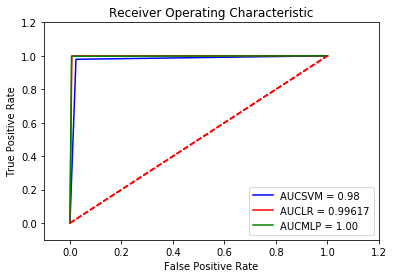

In [83]:
# SVM
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rateSVM, true_positive_rateSVM, 'b',
label='AUCSVM = %0.2f'% roc_aucSVM)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])

#Logistic
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rateLOG, true_positive_rateLOG, 'r',
label='AUCLR = %0.5f'% roc_aucLOG)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])

#MLP
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rateMLP, true_positive_rateMLP, 'g',
label='AUCMLP = %0.2f'% roc_aucMLP)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

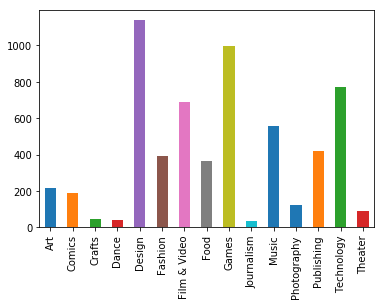

In [84]:
projectsCategory_out.drop(['ID','usd_goal_real','usd_pledged_real','state','Days Active'], 1).T.dot(projectsCategory_out.state).plot.bar()

In [85]:
pd.options.mode.chained_assignment = None
successfailData = prunedData
successfailData['state'] = truth.state
successfailData.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,0,15,US,100.0,2421.00,30000.0
29,100011318,My Moon - Animated Short Film,Animation,Film & Video,USD,2017-05-03,50000.0,2017-04-03 17:11:33,57577.31,1,840,US,10120.0,57577.31,50000.0
51,100020143,H2O The Underwater Portraits,People,Photography,USD,2017-10-30,9500.0,2017-09-25 17:17:43,6.00,0,2,US,5.0,6.00,9500.0
117,1000491057,AllThis TV,Comedy,Film & Video,USD,2017-04-09,50000.0,2017-03-10 01:12:32,40.00,0,3,US,20.0,40.00,50000.0
163,1000654409,Echo-Fuel: Make Echo Portable with Universal C...,Hardware,Technology,USD,2017-12-07,50000.0,2017-11-04 19:46:50,4237.00,0,12,US,4384.0,4237.00,50000.0


In [86]:
category_success_list = list(successfailData.category.value_counts().index)
#category_fail_list = list(successfailData[successfailData.state == 0].category.value_counts().index)

category_success_count_list = list(successfailData[successfailData.state == 1].category.value_counts())

category_fail_count_list = list(successfailData[successfailData.state == 0].category.value_counts())

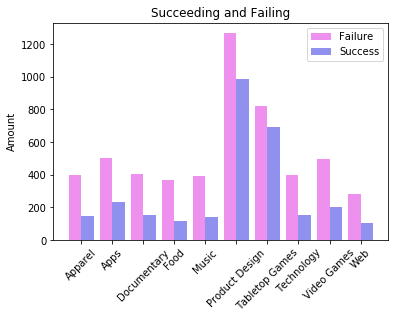

In [87]:
failplt = plt.bar(category_success_list[:10],category_fail_count_list[:10], color='#ee90ee', align="edge", width= -.4)
successplt = plt.bar(category_success_list[:10],category_success_count_list[:10], color='#9090ee', align="edge", width= .4)
plt.title("Succeeding and Failing")
plt.ylabel("Amount")
plt.legend(["Failure", "Success"])
locs,labels = plt.xticks()
plt.setp(labels,rotation = 45)
plt.show()

# Predicting Live Projects Based on Trained Models

In [88]:
X_testLive = liveProjectsCategory_out.drop(['ID', 'state'], axis=1)

In [89]:
y_predSVMLive = svm_clf.predict(X_testLive)
print("pred", y_predSVMLive[:20])

pred [0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0]


In [90]:
y_predREGLive = lr_clf.predict(X_testLive)

print("pred", y_predREGLive[:20])

pred [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [91]:
# mlp = MLPClassifier(hidden_layer_sizes=(30,30,30), max_iter=1000)
# mlp.fit(X_train, y_train)

y_predMLPLive = mlp.predict(X_testLive)
print("pred", y_predMLPLive[:20])

pred [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [92]:
predictionSVM = pd.DataFrame()
predictionREG = pd.DataFrame()
predictionMLP = pd.DataFrame()
testSVM = pd.DataFrame()
testREG = pd.DataFrame()
testMLP = pd.DataFrame()

In [93]:
predictionSVM = related_live_projects
predictionREG = related_live_projects
predictionMLP = related_live_projects

In [94]:
# pd.options.mode.chained_assignment = 'warn'
testSVM['ID'] = related_live_projects['ID']
testSVM['predictions'] = y_predSVMLive

testREG['ID'] = related_live_projects['ID']
testREG['predictions'] = y_predREGLive

testMLP['ID'] = related_live_projects['ID']
testMLP['predictions'] = y_predMLPLive

In [95]:
predictionSVM = predictionSVM.merge(testSVM, on='ID')
predictionREG = predictionREG.merge(testREG, on='ID')
predictionMLP = predictionMLP.merge(testMLP, on='ID')

In [96]:
predictionSVM.head(20)

,ID,name,main_category,launched,deadline,usd_goal_real,usd_pledged_real,predictions
0,1000149007,Unschooling To University Book Project,Publishing,2017-11-20 18:15:14,2018-01-19,2396.36,472.88,0
1,1000761521,KILOS.,Film & Video,2017-12-23 20:34:31,2018-02-06,5000.00,310.00,0
2,1002183790,The Man in the Field,Film & Video,2017-12-21 11:19:18,2018-01-08,1159.38,563.32,0
3,1002599057,Dear Atlantas,Film & Video,2017-12-18 02:48:27,2018-02-16,2000.00,5.00,0
4,1002629894,Art Calendar 2018,Art,2017-12-21 05:34:12,2018-01-06,52.32,0.00,0
5,100301082,"Feliz aÃ±o nuevo, mamÃ¡.",Theater,2017-12-06 03:36:06,2018-02-04,2563.83,52.32,0
6,1003104071,One GuitarMan Band,Music,2017-12-18 00:02:46,2018-01-17,2427.39,0.00,0
7,1003665581,Durango Falls TV Show,Film & Video,2017-11-21 10:56:11,2018-01-20,10000.00,1.00,0
8,1003819770,GrandLo CafÃ©,Food,2017-11-20 19:54:51,2018-01-19,25000.00,9097.00,0
9,100411349,E Coin Mining and Rig-Building Workshop,Technology,2017-11-22 20:28:28,2018-01-06,3100.00,225.00,0


In [97]:
predictionREG.head(20)

,ID,name,main_category,launched,deadline,usd_goal_real,usd_pledged_real,predictions
0,1000149007,Unschooling To University Book Project,Publishing,2017-11-20 18:15:14,2018-01-19,2396.36,472.88,0
1,1000761521,KILOS.,Film & Video,2017-12-23 20:34:31,2018-02-06,5000.00,310.00,0
2,1002183790,The Man in the Field,Film & Video,2017-12-21 11:19:18,2018-01-08,1159.38,563.32,0
3,1002599057,Dear Atlantas,Film & Video,2017-12-18 02:48:27,2018-02-16,2000.00,5.00,0
4,1002629894,Art Calendar 2018,Art,2017-12-21 05:34:12,2018-01-06,52.32,0.00,0
5,100301082,"Feliz aÃ±o nuevo, mamÃ¡.",Theater,2017-12-06 03:36:06,2018-02-04,2563.83,52.32,0
6,1003104071,One GuitarMan Band,Music,2017-12-18 00:02:46,2018-01-17,2427.39,0.00,0
7,1003665581,Durango Falls TV Show,Film & Video,2017-11-21 10:56:11,2018-01-20,10000.00,1.00,0
8,1003819770,GrandLo CafÃ©,Food,2017-11-20 19:54:51,2018-01-19,25000.00,9097.00,0
9,100411349,E Coin Mining and Rig-Building Workshop,Technology,2017-11-22 20:28:28,2018-01-06,3100.00,225.00,0


In [98]:
predictionMLP.head(20)

,ID,name,main_category,launched,deadline,usd_goal_real,usd_pledged_real,predictions
0,1000149007,Unschooling To University Book Project,Publishing,2017-11-20 18:15:14,2018-01-19,2396.36,472.88,0
1,1000761521,KILOS.,Film & Video,2017-12-23 20:34:31,2018-02-06,5000.00,310.00,0
2,1002183790,The Man in the Field,Film & Video,2017-12-21 11:19:18,2018-01-08,1159.38,563.32,0
3,1002599057,Dear Atlantas,Film & Video,2017-12-18 02:48:27,2018-02-16,2000.00,5.00,0
4,1002629894,Art Calendar 2018,Art,2017-12-21 05:34:12,2018-01-06,52.32,0.00,0
5,100301082,"Feliz aÃ±o nuevo, mamÃ¡.",Theater,2017-12-06 03:36:06,2018-02-04,2563.83,52.32,0
6,1003104071,One GuitarMan Band,Music,2017-12-18 00:02:46,2018-01-17,2427.39,0.00,0
7,1003665581,Durango Falls TV Show,Film & Video,2017-11-21 10:56:11,2018-01-20,10000.00,1.00,0
8,1003819770,GrandLo CafÃ©,Food,2017-11-20 19:54:51,2018-01-19,25000.00,9097.00,0
9,100411349,E Coin Mining and Rig-Building Workshop,Technology,2017-11-22 20:28:28,2018-01-06,3100.00,225.00,0
